In [6]:
import pickle

import numpy as np
np.set_printoptions(suppress=True)

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scienceplots
plt.style.use(['nature'])
# plt.style.use(['seaborn-v0_8-paper'])
# matplotlib.rcParams['text.usetex'] = True

from tqdm import tqdm
from shapely import LineString, Point
from seaborn import displot, histplot, relplot

from waymo_devkit.conflict import Conflict

In [7]:
with open('./pkl/conflict_pet15s.pkl', 'rb') as file:
    conflict_list_from_pickle = pickle.load(file)
print(f"#Conflicts: {len(conflict_list_from_pickle)}")

conflict_list = list()
for c in conflict_list_from_pickle:
    conflict_list.append(
        Conflict(
            leader_id=c['leader_id'],
            leader_index=c['leader_index'],
            leader_states=c['leader_states'],
            leader_time_at_conflict=c['leader_time_at_conflict'],
            follower_id=c['follower_id'],
            follower_index=c['follower_index'],
            follower_states=c['follower_states'],
            follower_time_at_conflict=c['follower_time_at_conflict'],
            PET=c['PET'],
            conflict_type=c['conflict_type'],
            leader_is_av=c['leader_is_av'],
            follower_is_av=c['follower_is_av'],
    ))

#Conflicts: 889


In [ ]:
for c_index, c in enumerate(conflict_list):
    c.plot_speed_profile()
    plt.savefig(f"./outputs/speed_profile/{c_index}.png", dpi=400, bbox_inches="tight")
    plt.close()

In [ ]:
c = conflict_list[115]

import scipy.signal
from scipy.signal import butter, filtfilt
from tqdm import tqdm


def remove_outliers(data, jump_threshold=2, offset:int=10):
    smoothed_data = data.copy()

    # remove the jumps in the beginning of speed profile
    for index in [4,3,2,1,0]:
        if abs(smoothed_data[index] - smoothed_data[index: index + offset].mean()) > jump_threshold:
            smoothed_data[index] = smoothed_data[index: index + offset].mean()

    # remove the jumps in the middle of speed profile
    for i in range(1, len(smoothed_data) - 2):
        if abs(smoothed_data[i] - smoothed_data[i-1]) > jump_threshold and \
           abs(smoothed_data[i] - smoothed_data[i+2]) > jump_threshold:
            smoothed_data[i] = (smoothed_data[i-1] + smoothed_data[i+2]) / 2
    return smoothed_data

def robust_low_pass_filter(data, cutoff=0.5, fs=10.0, order=4, jump_threshold=1):
    # Remove outliers
    data_no_outliers = remove_outliers(data, jump_threshold)
    # Apply low-pass filter
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data_no_outliers)
    return y

for c_index, c in tqdm(enumerate(conflict_list)):
    # print(c_index)
    # Apply the robust low-pass filter to the leader and follower data
    leader_v_smooth_lp = robust_low_pass_filter(c.leader_traj_speed, cutoff=0.5, fs=10.0, order=4, jump_threshold=1)
    follower_v_smooth_lp = robust_low_pass_filter(c.follower_traj_speed, cutoff=0.5, fs=10.0, order=4, jump_threshold=1)
    
    # Plotting the original data and the smoothed data using Low Pass Filter
    plt.figure(figsize=(12, 6))
    
    plt.scatter(c.leader_traj_timestamp, c.leader_traj_speed, label='Original Leader Trajectory', color='blue', s=10, alpha=0.5)
    plt.scatter(c.follower_traj_timestamp, c.follower_traj_speed, label='Original Follower Trajectory', color='red', s=10, alpha=0.5)
    plt.plot(c.leader_traj_timestamp, leader_v_smooth_lp, label='Smoothed Leader Trajectory (LPF)', color='blue')
    plt.plot(c.follower_traj_timestamp, follower_v_smooth_lp, label='Smoothed Follower Trajectory (LPF)', color='red')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Speed (m/s)')
    plt.title('Leader and Follower Trajectories Over Time (Robust Low Pass Filter)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"./outputs/speed_profile/{c_index}.png")
    # plt.show()
    plt.close()

1it [00:00,  5.20it/s]

0
1


3it [00:00,  5.98it/s]

2
3


5it [00:00,  5.95it/s]

4
5


7it [00:01,  5.72it/s]

6
7


8it [00:01,  5.32it/s]

8


10it [00:01,  5.32it/s]

9
10


12it [00:02,  5.29it/s]

11
12


14it [00:02,  5.18it/s]

13
14


16it [00:02,  5.50it/s]

15
16


18it [00:03,  5.90it/s]

17
18


20it [00:03,  6.11it/s]

19
20


22it [00:03,  5.56it/s]

21
22


23it [00:04,  4.42it/s]

23


25it [00:04,  5.04it/s]

24
25


27it [00:05,  5.26it/s]

26
27


29it [00:05,  5.62it/s]

28
29


31it [00:05,  5.95it/s]

30
31


33it [00:05,  6.04it/s]

32
33


35it [00:06,  5.99it/s]

34
35


37it [00:06,  5.80it/s]

36
37


39it [00:06,  6.01it/s]

38
39


41it [00:07,  6.04it/s]

40
41


43it [00:07,  6.15it/s]

42
43


45it [00:07,  5.89it/s]

44
45


47it [00:08,  6.02it/s]

46
47


49it [00:08,  6.09it/s]

48
49


51it [00:08,  6.33it/s]

50
51


53it [00:09,  6.31it/s]

52
53


55it [00:09,  6.37it/s]

54
55


56it [00:09,  6.04it/s]

56


58it [00:10,  4.98it/s]

57
58


60it [00:10,  5.35it/s]

59
60


62it [00:10,  5.79it/s]

61
62


64it [00:11,  6.03it/s]

63
64


66it [00:11,  6.19it/s]

65
66


68it [00:11,  6.21it/s]

67
68


69it [00:12,  6.01it/s]

69


71it [00:12,  5.62it/s]

70
71


73it [00:12,  5.67it/s]

72
73


75it [00:13,  5.89it/s]

74
75


77it [00:13,  5.93it/s]

76
77


79it [00:13,  5.85it/s]

78
79


81it [00:14,  6.17it/s]

80
81


83it [00:14,  5.73it/s]

82
83


85it [00:14,  5.76it/s]

84
85


87it [00:15,  6.06it/s]

86
87


89it [00:15,  6.20it/s]

88
89


91it [00:15,  6.27it/s]

90
91


93it [00:16,  6.38it/s]

92
93


95it [00:16,  6.42it/s]

94
95


97it [00:16,  6.21it/s]

96
97


98it [00:16,  5.77it/s]

98


100it [00:17,  5.01it/s]

99
100


102it [00:17,  5.48it/s]

101
102


104it [00:18,  5.70it/s]

103
104


106it [00:18,  6.01it/s]

105
106


108it [00:18,  6.21it/s]

107
108


110it [00:19,  5.90it/s]

109
110


112it [00:19,  6.26it/s]

111
112


114it [00:19,  6.44it/s]

113
114


116it [00:19,  6.33it/s]

115
116


118it [00:20,  6.30it/s]

117
118


120it [00:20,  6.44it/s]

119
120


122it [00:20,  6.54it/s]

121
122


124it [00:21,  6.23it/s]

123
124


126it [00:21,  6.40it/s]

125
126


128it [00:21,  6.46it/s]

127
128


130it [00:22,  6.27it/s]

129
130


132it [00:22,  6.34it/s]

131
132


134it [00:22,  6.37it/s]

133
134


136it [00:23,  6.41it/s]

135
136


138it [00:23,  6.45it/s]

137
138


140it [00:23,  6.44it/s]

139
140


142it [00:24,  6.47it/s]

141
142


144it [00:24,  6.36it/s]

143
144


146it [00:24,  6.48it/s]

145
146


148it [00:24,  6.52it/s]

147
148


150it [00:25,  6.43it/s]

149
150


151it [00:25,  6.49it/s]

151


153it [00:25,  4.88it/s]

152
153


155it [00:26,  5.56it/s]

154
155


157it [00:26,  5.92it/s]

156
157


159it [00:26,  6.08it/s]

158
159


161it [00:27,  6.24it/s]

160
161


163it [00:27,  5.63it/s]

162
163


165it [00:27,  5.89it/s]

164
165


167it [00:28,  6.07it/s]

166
167


169it [00:28,  6.09it/s]

168
169


171it [00:28,  6.10it/s]

170
171


173it [00:29,  6.23it/s]

172
173


175it [00:29,  6.00it/s]

174
175


177it [00:29,  6.06it/s]

176
177


179it [00:30,  6.20it/s]

178
179


181it [00:30,  6.25it/s]

180
181


183it [00:30,  6.29it/s]

182
183


185it [00:31,  6.20it/s]

184
185


187it [00:31,  6.31it/s]

186
187


189it [00:31,  6.35it/s]

188
189


191it [00:32,  5.94it/s]

190
191


193it [00:32,  6.20it/s]

192
193


195it [00:32,  6.13it/s]

194
195


197it [00:33,  6.33it/s]

196
197


199it [00:33,  6.33it/s]

198
199


201it [00:33,  6.45it/s]

200
201


203it [00:34,  6.25it/s]

202
203


205it [00:34,  6.17it/s]

204
205


207it [00:34,  6.22it/s]

206
207


209it [00:35,  6.36it/s]

208
209


211it [00:35,  6.30it/s]

210
211


213it [00:35,  6.34it/s]

212
213


214it [00:35,  6.23it/s]

214


216it [00:36,  4.64it/s]

215
216


218it [00:36,  5.28it/s]

217
218


220it [00:37,  5.70it/s]

219
220


222it [00:37,  5.88it/s]

221
222


224it [00:37,  5.98it/s]

223
224


226it [00:38,  6.29it/s]

225
226


228it [00:38,  6.41it/s]

227
228


230it [00:38,  6.10it/s]

229
230


232it [00:38,  6.25it/s]

231
232


234it [00:39,  6.23it/s]

233
234


236it [00:39,  6.36it/s]

235
236


238it [00:39,  6.43it/s]

237
238


240it [00:40,  6.37it/s]

239
240


242it [00:40,  6.33it/s]

241
242


244it [00:40,  6.27it/s]

243
244


246it [00:41,  6.08it/s]

245
246


248it [00:41,  6.22it/s]

247
248


250it [00:41,  6.20it/s]

249
250


252it [00:42,  6.18it/s]

251
252


254it [00:42,  6.11it/s]

253
254


256it [00:42,  6.22it/s]

255
256


258it [00:43,  6.12it/s]

257
258


260it [00:43,  5.99it/s]

259
260


262it [00:43,  6.07it/s]

261
262


264it [00:44,  5.88it/s]

263
264


266it [00:44,  6.12it/s]

265
266


268it [00:44,  6.37it/s]

267
268


270it [00:45,  5.97it/s]

269
270


272it [00:45,  5.93it/s]

271
272


274it [00:45,  5.98it/s]

273
274


276it [00:46,  5.99it/s]

275
276


278it [00:46,  6.04it/s]

277
278


280it [00:46,  6.09it/s]

279
280


282it [00:47,  6.14it/s]

281
282


284it [00:47,  5.85it/s]

283
284


286it [00:47,  5.83it/s]

285
286


288it [00:48,  6.01it/s]

287
288


290it [00:48,  6.15it/s]

289
290


292it [00:48,  5.89it/s]

291
292


293it [00:49,  5.74it/s]

293


294it [00:49,  4.41it/s]

294


295it [00:59,  3.13s/it]

295


296it [01:19,  8.34s/it]

296


297it [01:59, 17.67s/it]

297


298it [02:50, 27.72s/it]

298


299it [03:21, 28.79s/it]

299


300it [04:42, 44.30s/it]

300


301it [05:52, 52.12s/it]

301


302it [09:21, 99.21s/it]

302


303it [13:40, 147.07s/it]

303


In [11]:
def plot_smoothed_speed_profile_comparison(
    conflict: Conflict,
    smooth_av: bool = False,
):
    """ draw the raw and smoothed versions of the speed profiles of the vehicles involved in the conflict """
    FIGURE_WIDTH, FIGURE_HEIGHT = 6, 2
    LEADER_BEFORE_COLOR = "green"
    LEADRE_AFTER_COLOR = "blue"
    FOLLOWER_BEFORE_COLOR = "red" 
    FOLLOWER_AFTER_COLOR = "orange"
    MARKER_SIZE = 1
    VERTICAL_LINE_STYLE = "--"
    
    fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))
            
    # raw speed profiles:
    # axs[0].plot(conflict.leader_traj_timestamp, conflict.leader_traj_speed, c=LEADER_COLOR, label="Leader")
    # axs[0].plot(conflict.follower_traj_timestamp, conflict.follower_traj_speed, c=FOLLOWER_COLOR, label="Follower")
    # axs[0].axvline(x=conflict.leader_time_at_conflict, c=LEADER_COLOR, ls=VERTICAL_LINE_STYLE, label="Leader at conflict point")
    # axs[0].axvline(x=conflict.follower_time_at_conflict, c=FOLLOWER_COLOR, ls=VERTICAL_LINE_STYLE, label="Follower at conflict point")
    # axs[0].set_xlim([0, 20])
    # axs[0].set_ylabel("Speed (m/s)")
    # axs[0].legend(loc='best')        
    # axs[0].set_title("Before data smoothing")

    def three_sigma_smoothing(signal, window_size=30, threshold=0.15):
        """
        Apply 3-sigma smoothing to a signal.
        
        Parameters:
            - signal: The input signal to be smoothed.
            - window_size: The size of the smoothing window.
            - threshold: The threshold in terms of standard deviations.
        
        Returns:
            - smoothed_signal: The smoothed signal.
        """
        smoothed_signal = np.zeros_like(signal)
        for i in range(len(signal)):
            start = max(0, i - window_size//2)
            end = min(len(signal), i + window_size//2 + 1)
            window = signal[start:end]
            mean = np.mean(window)
            std = np.std(window)
            if np.abs(signal[i] - mean) > threshold * std:
                smoothed_signal[i] = mean
            else:
                smoothed_signal[i] = signal[i]
        return smoothed_signal

    # smooth operation
    if conflict.leader_is_av:
        if smooth_av:
            leader_smoothed_v = three_sigma_smoothing(conflict.leader_traj_speed)
        else:
            leader_smoothed_v = conflict.leader_traj_speed
    else:
        # smooth the HV speed profile
        leader_smoothed_v = three_sigma_smoothing(conflict.leader_traj_speed)

    if conflict.follower_is_av:
        if smooth_av:
            follower_smoothed_v = three_sigma_smoothing(conflict.follower_traj_speed)
        else:
            follower_smoothed_v = conflict.follower_traj_speed
    else:
        # smooth the HV speed profile
        follower_smoothed_v = three_sigma_smoothing(conflict.follower_traj_speed)    

    axs.plot(conflict.leader_traj_timestamp, conflict.leader_traj_speed, c=LEADER_BEFORE_COLOR, label="Leader (before smoothing)")
    axs.plot(conflict.leader_traj_timestamp, leader_smoothed_v, c=LEADRE_AFTER_COLOR, label="Leader (after smoothing)")
    axs.plot(conflict.follower_traj_timestamp, conflict.follower_traj_speed, c=FOLLOWER_BEFORE_COLOR, label="Follower (before smoothing)")
    axs.plot(conflict.follower_traj_timestamp, follower_smoothed_v, c=FOLLOWER_AFTER_COLOR, label="Follower (after smoothing)")

    # axs.axvline(x=conflict.leader_time_at_conflict, c=LEADER_COLOR, ls=VERTICAL_LINE_STYLE, label="Leader at conflict point")
    # axs.axvline(x=conflict.follower_time_at_conflict, c=FOLLOWER_COLOR, ls=VERTICAL_LINE_STYLE, label="Follower at conflict point")
    axs.set_xlim([0, 20])
    axs.set_xlabel("Timestamp (s)")
    axs.set_ylabel("Speed (m/s)")
    axs.legend(loc='best') 
    # axs.set_title("After data smoothing")
    
    plt.suptitle(f"{conflict.leader_type}-{conflict.follower_type} - {conflict.conflict_type} (Waymo)")
    plt.savefig(f"./outputs/speed_profile.png", dpi=400, bbox_inches="tight")
    plt.show()

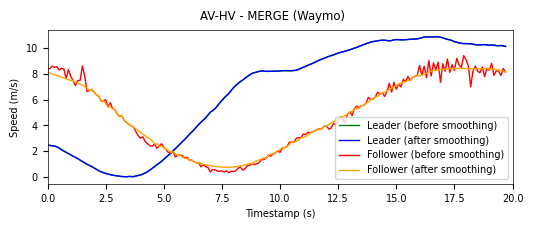

In [101]:
plot_smoothed_speed_profile_comparison(conflict_list[112])

In [115]:
# ds = list()
# for c in conflict_list:   
#     d = {
#         "leader_v": c.leader_traj_speed,
#         "leader_t": c.leader_traj_timestamp,
#         "follower_v": c.follower_traj_speed,
#         "follower_t": c.follower_traj_timestamp
#     }
#     ds.append(d)

# # Save the dictionary to a file
# with open('waymo.pkl', 'wb') as file:
#     pickle.dump(ds, file)

## Scatterplot of the smoothed trajectories

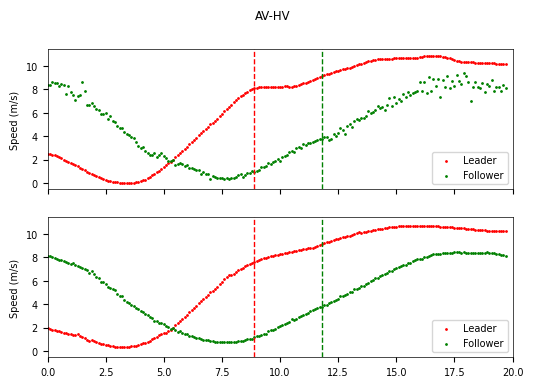

In [62]:
assert len(c.leader_traj_speed) == len(c.leader_traj_timestamp)

FIGURE_WIDTH, FIGURE_HEIGHT = 5, 2
LEADER_COLOR = "r"
FOLLOWER_COLOR = "g"
MARKER_SIZE = 1
VERTICAL_LINE_STYLE = "--"

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(6, 4))
        
# raw speed profiles:
axs[0].scatter(c.leader_traj_timestamp, c.leader_traj_speed, c=LEADER_COLOR, s= MARKER_SIZE, label="Leader")
axs[0].scatter(c.follower_traj_timestamp, c.follower_traj_speed, c=FOLLOWER_COLOR, s= MARKER_SIZE, label="Follower")
axs[0].axvline(x=c.leader_time_at_conflict, c=LEADER_COLOR, ls=VERTICAL_LINE_STYLE)
axs[0].axvline(x=c.follower_time_at_conflict, c=FOLLOWER_COLOR, ls=VERTICAL_LINE_STYLE)
axs[0].set_xlim([0, 20])
axs[0].set_ylabel("Speed (m/s)")
axs[0].legend(loc=4)        
        
# raw speed profiles:
# if not c.leader_is_av:
leader_smoothed_v = three_sigma_smoothing(c.leader_traj_speed)
# else:
#     leader_smoothed_v = c.leader_traj_speed
# if not c.follower_is_av:
follower_smoothed_v = three_sigma_smoothing(c.follower_traj_speed)
# else:
    # follower_smoothed_v = c.follower_traj_speed


axs[1].scatter(c.leader_traj_timestamp, leader_smoothed_v, c=LEADER_COLOR, s= MARKER_SIZE, label="Leader")
axs[1].scatter(c.follower_traj_timestamp, follower_smoothed_v, c=FOLLOWER_COLOR, s= MARKER_SIZE, label="Follower")
axs[1].axvline(x=c.leader_time_at_conflict, c=LEADER_COLOR, ls=VERTICAL_LINE_STYLE)
axs[1].axvline(x=c.follower_time_at_conflict, c=FOLLOWER_COLOR, ls=VERTICAL_LINE_STYLE)
axs[1].set_xlim([0, 20])
axs[1].set_ylabel("Speed (m/s)")
axs[1].legend(loc=4) 

plt.suptitle(f"{c.leader_type}-{c.follower_type}")
# plt.savefig(f"./outputs/speed_profile.png", dpi=400, bbox_inches="tight")
plt.show()